In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor


# Soil Quality Index

In [9]:
file ='C:/Users/ASUS/OneDrive/Desktop/BENNETT UNIVERSITY/Semester 5/Competitive Programming/Project/CompProg/soilPollution.csv'
df6 = pd.read_csv(file, encoding = 'cp1252')
df6

,Company Number,State,Steel Industry Location,Arsenic,Cadmium,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,doxins and furons,Change in PH
0,1,Maharashtra,Mumbai,12561.3599,1186.2325,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,5.5043,1.800
1,2,Maharashtra,Pune,14500.9188,1058.2704,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,8.0927,1.750
2,3,Maharashtra,Nagpur,14042.7182,1131.8718,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,7.7799,1.720
3,4,Gujarat,Ahmedabad,13511.5129,2999.4715,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,2.6324,1.740
4,5,Gujarat,Vadodara,14902.9448,1799.9589,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,9.9416,1.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,157,Rajasthan,Jaipur,12340.6145,2127.5654,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,4.8273,1.870
157,158,Rajasthan,Alwar,12001.5670,1802.4560,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.5600,1.745
158,159,Madhya Pradesh,Indore,15432.6780,2034.7890,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,2.3450,1.678
159,160,Madhya Pradesh,Bhopal,11789.0120,1798.1230,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.2340,1.890


In [10]:
df6 = df6.drop(['Cadmium', 'doxins and furons','Company Number'], axis = 1)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150
...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890


In [11]:
df6.columns

Index(['State', 'Steel Industry Location', 'Arsenic', 'Chromium', 'Copper',
       'Lead', 'Mercury', 'Nickel', 'Zinc', 'polyaromatic hydrocarbons',
       'Change in PH'],
      dtype='object')

In [12]:
max_v = df6['Arsenic'].max()
min_v = df6['Arsenic'].min()
print("Max:", max_v, "Min:", min_v)

Max: 19959.1812 Min: 10023.582


In [13]:
max_v = df6['Chromium'].max()
min_v = df6['Chromium'].min()

print("Max:", max_v, "Min:", min_v)



Max: 39796.7177 Min: 20192.2761


In [14]:
max_v = df6['Copper'].max()
min_v = df6['Copper'].min()
print("Max:", max_v, "Min:", min_v)



Max: 199575.0025 Min: 100304.3613


In [15]:
max_v = df6['Lead'].max()
min_v = df6['Lead'].min()
print("Max:", max_v, "Min:", min_v)



Max: 498627.6856 Min: 102910.0459


In [16]:
max_v = df6['Mercury'].max()
min_v = df6['Mercury'].min()

print("Max:", max_v, "Min:", min_v)



Max: 1997.4933 Min: 504.0413


In [17]:
max_v = df6['Nickel'].max()
min_v = df6['Nickel'].min()

print("Max:", max_v, "Min:", min_v)



Max: 9989.9529 Min: 5077.4143


In [18]:
max_v = df6['Zinc'].max()
min_v = df6['Zinc'].min()

print("Max:", max_v, "Min:", min_v)



Max: 59872.0396 Min: 30639.4367


In [19]:
max_v = df6['polyaromatic hydrocarbons'].max()
min_v = df6['polyaromatic hydrocarbons'].min()

print("Max:", max_v, "Min:", min_v)



Max: 999.3917 Min: 498.901


In [20]:
max_v = df6['Change in PH'].max()
min_v = df6['Change in PH'].min()

print("Max:", max_v, "Min:", min_v)



Max: 2.33 Min: 1.0


In [21]:
def calculate_subindex_arsenic(x):
    return 100 * (x - 10023.582) / (19959.1812 - 10023.582) if 19959.1812 >= x >= 10023.582 else 0

df6['Arsenic_SubIndex'] = df6['Arsenic'].apply(calculate_subindex_arsenic)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900
...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732


In [22]:
def calculate_subindex_chromium(x):
    return 100 * (x - 20192.2761) / (39796.7177 - 20192.2761) if 39796.7177 >= x >= 20192.2761 else 0


df6['Chromium_SubIndex'] = df6['Chromium'].apply(calculate_subindex_chromium)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757


In [23]:
def calculate_subindex_copper(x):
    return 100 * (x - 100304.3613) / (199575.0025 - 100304.3613) if 199575.0025 >= x >= 100304.3613 else 0

df6['Copper_SubIndex'] = df6['Copper'].apply(calculate_subindex_copper)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997,99.892691
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349,61.686703
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495,79.079443
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906,67.325505
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000,34.402594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716,3.779159
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570,19.715671
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230,51.304399
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757,18.733507


In [24]:
def calculate_subindex_lead(x):
    return 100 * (x - 102910.0459) / (498627.6856 - 102910.0459) if 498627.6856 >= x >= 102910.0459 else 0

df6['Lead_SubIndex'] = df6['Lead'].apply(calculate_subindex_lead)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997,99.892691,53.274808
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349,61.686703,48.182038
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495,79.079443,45.074553
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906,67.325505,51.369791
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000,34.402594,5.101392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716,3.779159,79.602467
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570,19.715671,19.512277
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230,51.304399,24.847169
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757,18.733507,19.231465


In [25]:
def calculate_subindex_mercury(x):
    return 100 * (x - 504.0413) / (1997.4933 - 504.0413) if 1997.4933 >= x >= 504.0413 else 0

df6['Mercury_SubIndex'] = df6['Mercury'].apply(calculate_subindex_mercury)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex,Mercury_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997,99.892691,53.274808,52.578141
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349,61.686703,48.182038,6.923831
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495,79.079443,45.074553,59.650461
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906,67.325505,51.369791,30.957105
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000,34.402594,5.101392,27.874964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716,3.779159,79.602467,50.381579
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570,19.715671,19.512277,47.323094
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230,51.304399,24.847169,66.637073
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757,18.733507,19.231465,46.980867


In [26]:
def calculate_subindex_nickel(x):
    return 100 * (x - 5077.4143) / (9989.9529 - 5077.4143) if 9989.9529 >= x >= 5077.4143 else 0

df6['Nickel_SubIndex'] = df6['Nickel'].apply(calculate_subindex_nickel)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex,Mercury_SubIndex,Nickel_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997,99.892691,53.274808,52.578141,19.424668
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349,61.686703,48.182038,6.923831,18.176425
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495,79.079443,45.074553,59.650461,48.285947
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906,67.325505,51.369791,30.957105,91.078839
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000,34.402594,5.101392,27.874964,22.066455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716,3.779159,79.602467,50.381579,93.231092
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570,19.715671,19.512277,47.323094,19.438640
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230,51.304399,24.847169,66.637073,60.196020
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757,18.733507,19.231465,46.980867,18.556550


In [27]:
def calculate_subindex_zinc(x):
    return 100 * (x - 30639.4367) / (59872.0396 - 30639.4367) if 59872.0396 >= x >= 30639.4367 else 0

df6['Zinc_SubIndex'] = df6['Zinc'].apply(calculate_subindex_zinc)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex,Mercury_SubIndex,Nickel_SubIndex,Zinc_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997,99.892691,53.274808,52.578141,19.424668,0.000000
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349,61.686703,48.182038,6.923831,18.176425,95.245777
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495,79.079443,45.074553,59.650461,48.285947,96.365236
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906,67.325505,51.369791,30.957105,91.078839,33.881924
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000,34.402594,5.101392,27.874964,22.066455,81.570146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716,3.779159,79.602467,50.381579,93.231092,37.807824
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570,19.715671,19.512277,47.323094,19.438640,16.859772
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230,51.304399,24.847169,66.637073,60.196020,34.720053
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757,18.733507,19.231465,46.980867,18.556550,15.719197


In [28]:
def calculate_subindex_polyhydrocarbons(x):
    return 100 * (x - 498.901) / (999.3917 - 498.901) if 999.3917 >= x >= 498.901 else 0

df6['polyaromatic hydrocarbons_SubIndex'] = df6['polyaromatic hydrocarbons'].apply(calculate_subindex_polyhydrocarbons)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex,Mercury_SubIndex,Nickel_SubIndex,Zinc_SubIndex,polyaromatic hydrocarbons_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997,99.892691,53.274808,52.578141,19.424668,0.000000,90.807981
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349,61.686703,48.182038,6.923831,18.176425,95.245777,16.487459
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495,79.079443,45.074553,59.650461,48.285947,96.365236,5.054839
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906,67.325505,51.369791,30.957105,91.078839,33.881924,17.939554
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000,34.402594,5.101392,27.874964,22.066455,81.570146,67.260910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716,3.779159,79.602467,50.381579,93.231092,37.807824,18.344537
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570,19.715671,19.512277,47.323094,19.438640,16.859772,1.176445
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230,51.304399,24.847169,66.637073,60.196020,34.720053,40.648907
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757,18.733507,19.231465,46.980867,18.556550,15.719197,0.000000


In [29]:
def calculate_subindex_change_in_ph(x):
    return 100 * (x - 1.0) / (2.33 - 1.0) if 2.33 >= x >= 1.0 else 0

# Create subindex for 'Change in PH'
df6['Change in PH_SubIndex'] = df6['Change in PH'].apply(calculate_subindex_change_in_ph)
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,Change in PH,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex,Mercury_SubIndex,Nickel_SubIndex,Zinc_SubIndex,polyaromatic hydrocarbons_SubIndex,Change in PH_SubIndex
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,1.800,25.542273,14.679997,99.892691,53.274808,52.578141,19.424668,0.000000,90.807981,60.150376
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,1.750,45.063581,87.242349,61.686703,48.182038,6.923831,18.176425,95.245777,16.487459,56.390977
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,1.720,40.451875,4.480495,79.079443,45.074553,59.650461,48.285947,96.365236,5.054839,54.135338
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,1.740,35.105391,38.054906,67.325505,51.369791,30.957105,91.078839,33.881924,17.939554,55.639098
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,1.150,49.109900,100.000000,34.402594,5.101392,27.874964,22.066455,81.570146,67.260910,11.278195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,1.870,23.320511,6.938716,3.779159,79.602467,50.381579,93.231092,37.807824,18.344537,65.413534
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,1.745,19.908059,24.522570,19.715671,19.512277,47.323094,19.438640,16.859772,1.176445,56.015038
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,1.678,54.441568,53.488230,51.304399,24.847169,66.637073,60.196020,34.720053,40.648907,50.977444
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,1.890,17.768732,22.885757,18.733507,19.231465,46.980867,18.556550,15.719197,0.000000,66.917293


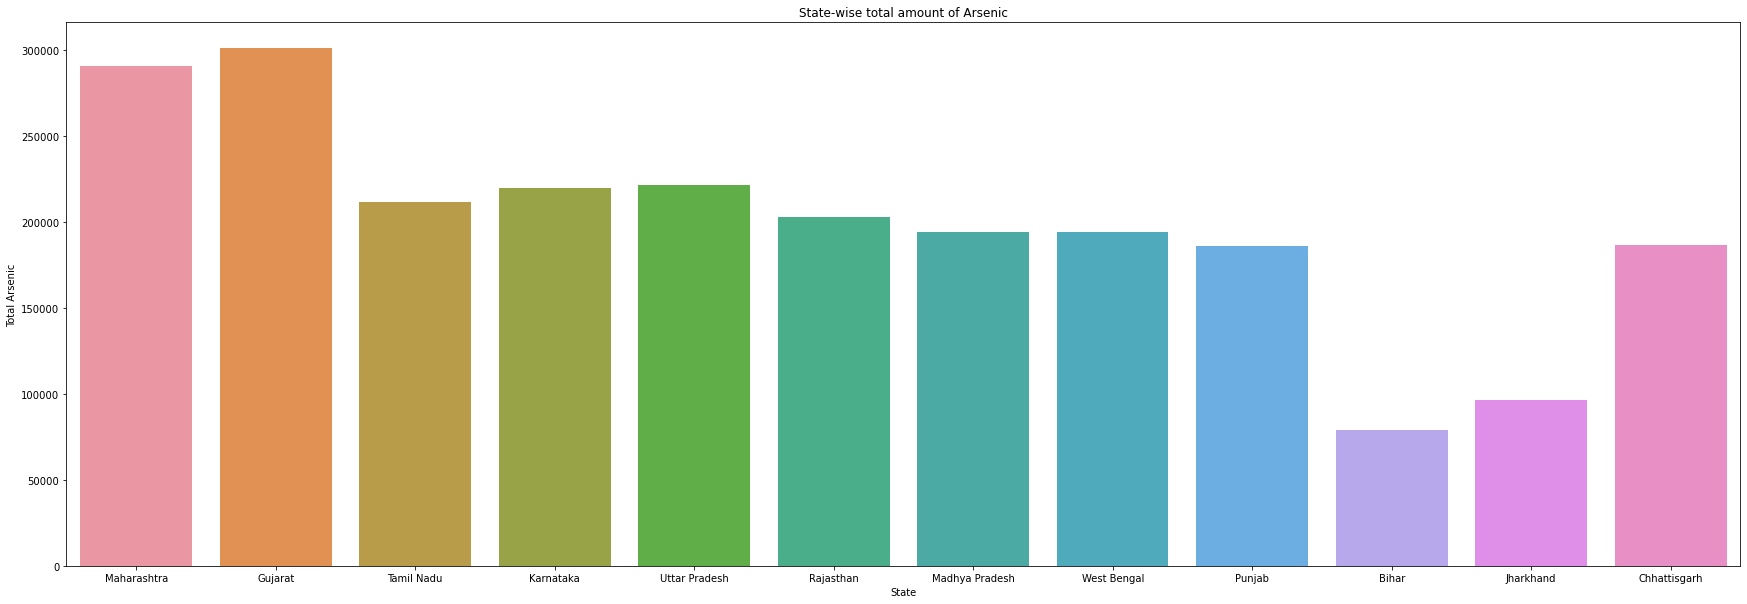

In [30]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Arsenic', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Arsenic')
plt.xlabel('State')
plt.ylabel('Total Arsenic')
plt.show()

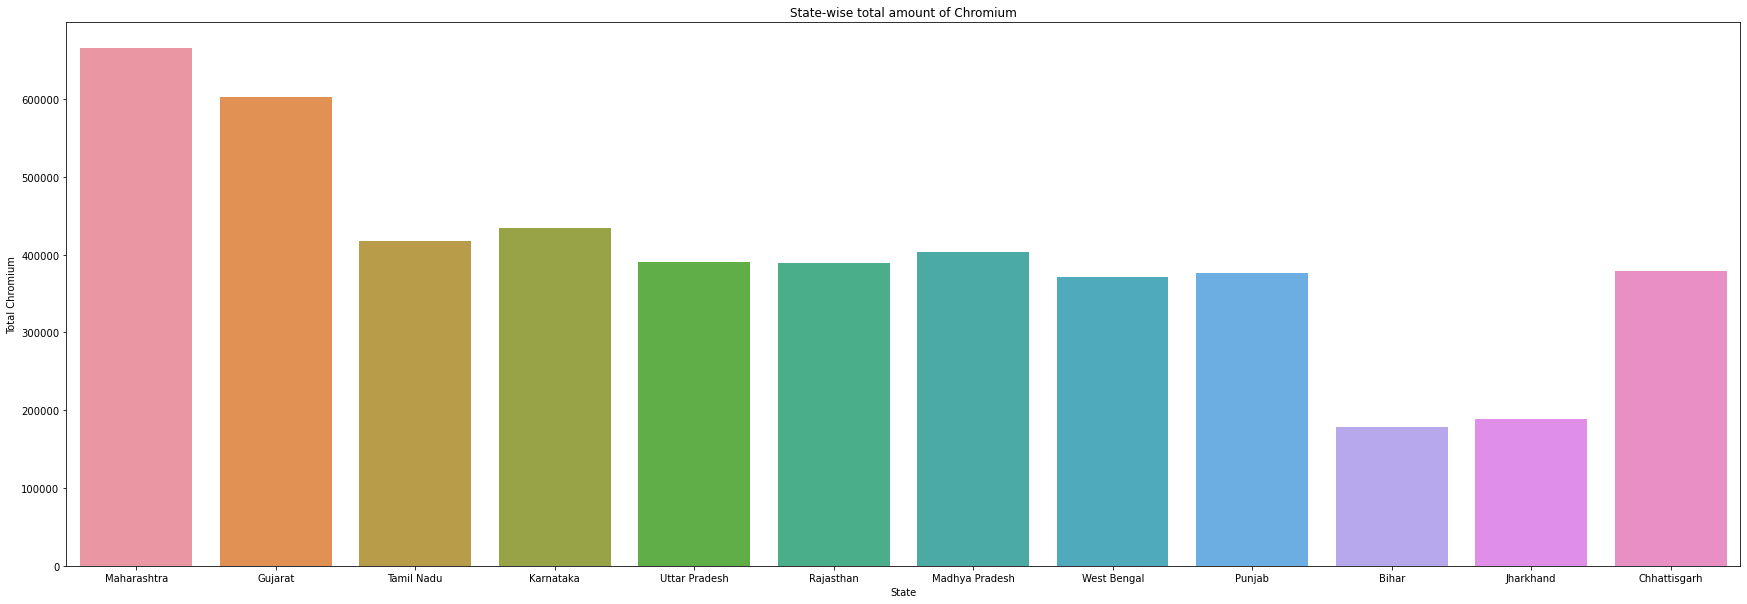

In [31]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Chromium', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Chromium')
plt.xlabel('State')
plt.ylabel('Total Chromium')
plt.show()

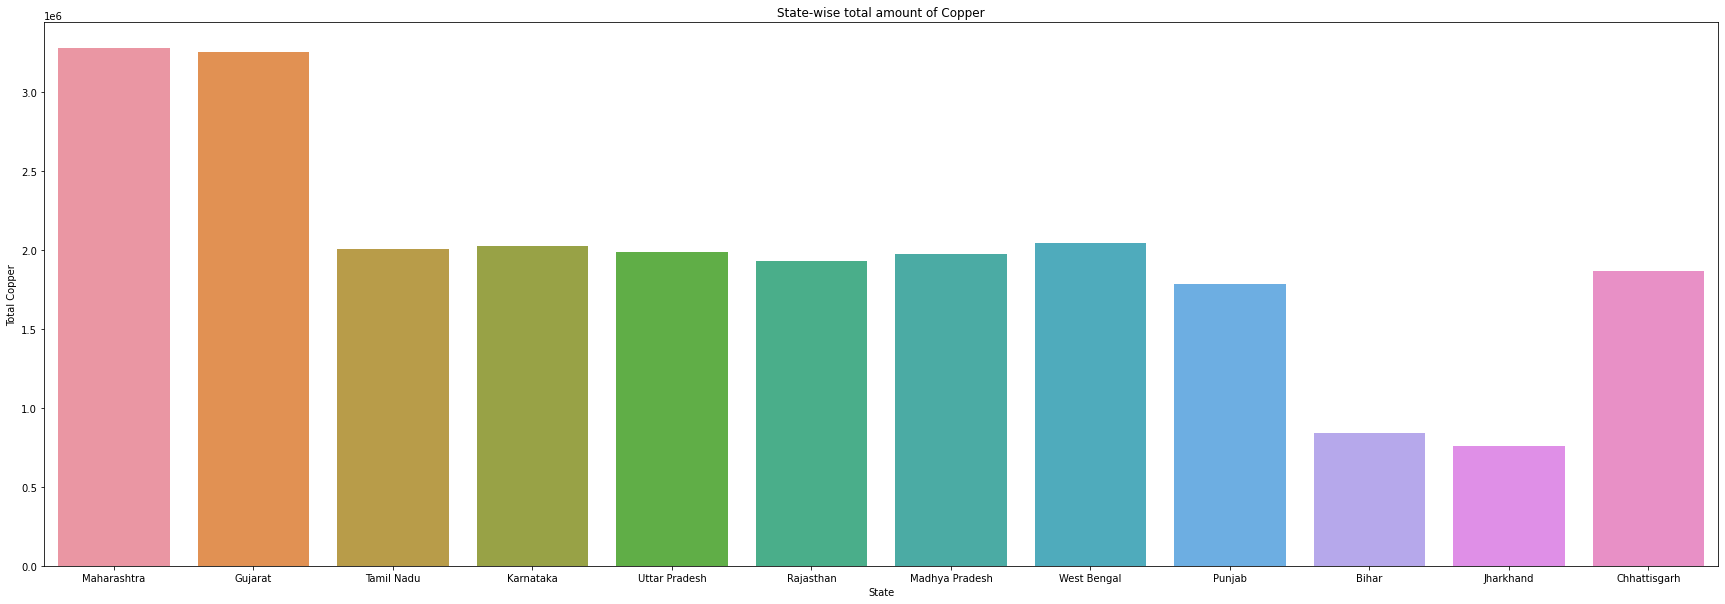

In [32]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Copper', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Copper')
plt.xlabel('State')
plt.ylabel('Total Copper')
plt.show()

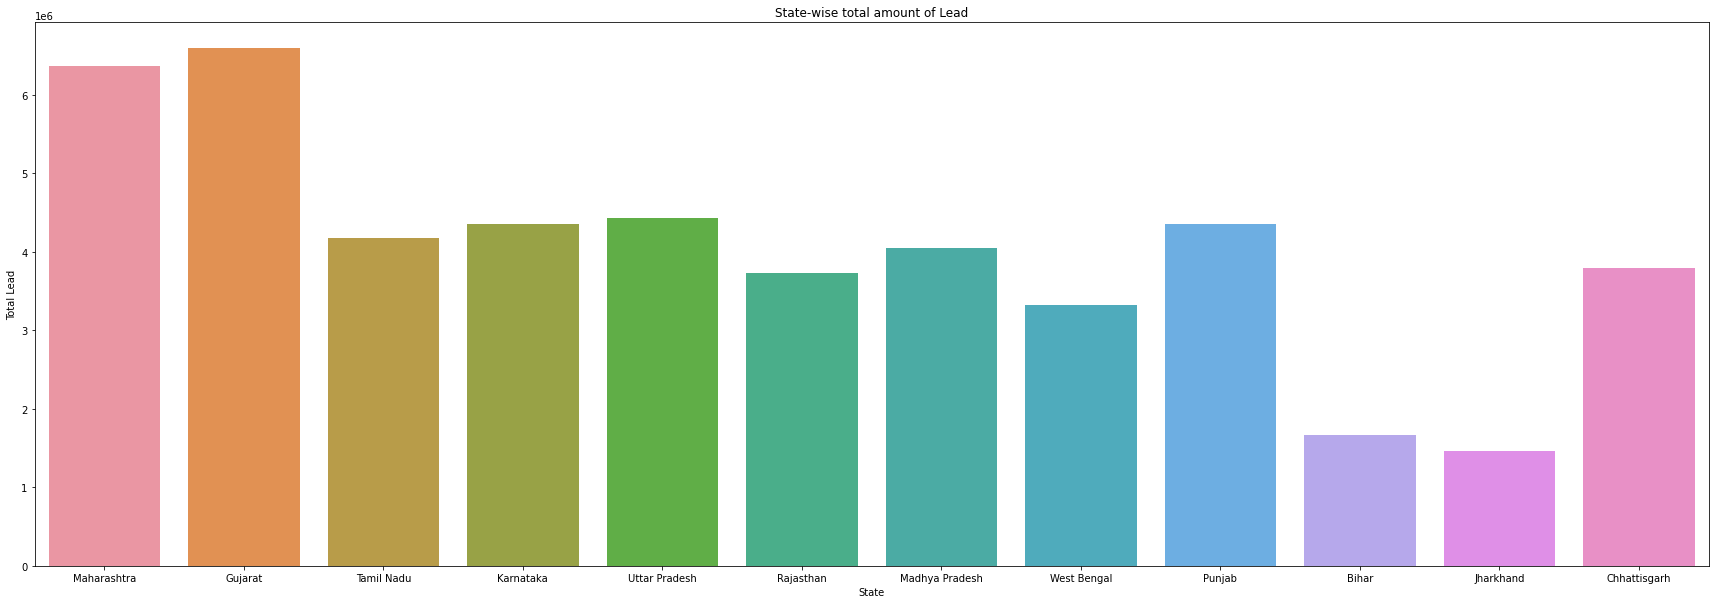

In [33]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Lead', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Lead')
plt.xlabel('State')
plt.ylabel('Total Lead')
plt.show()

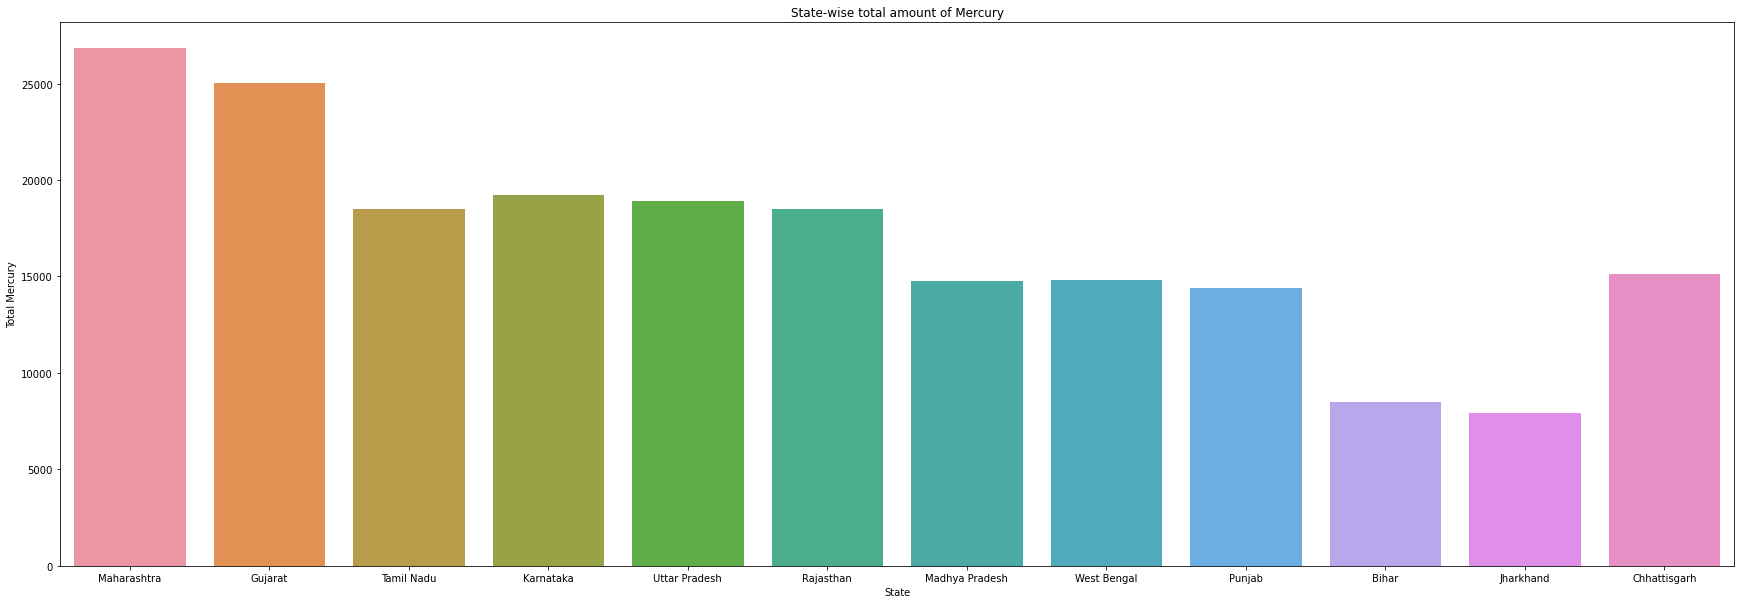

In [34]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Mercury', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Mercury')
plt.xlabel('State')
plt.ylabel('Total Mercury')
plt.show()

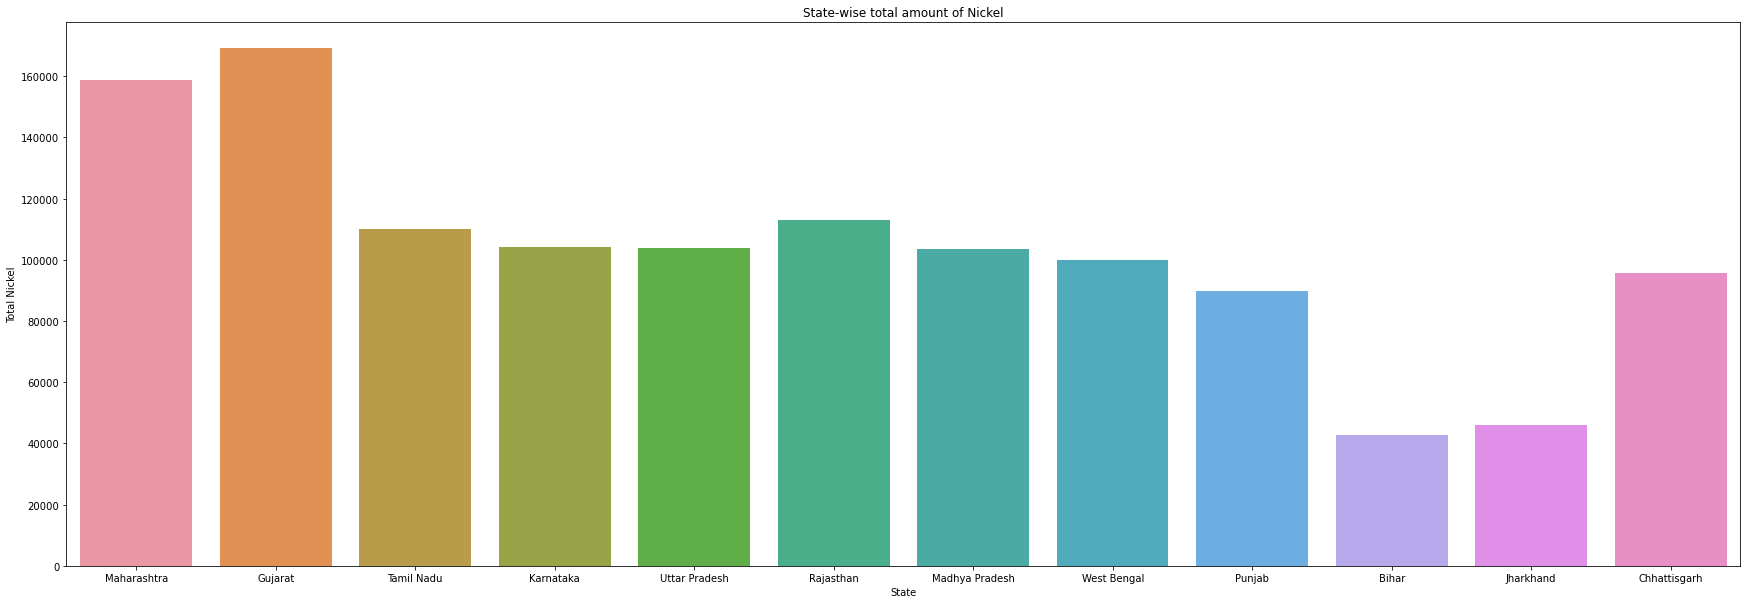

In [35]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Nickel', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Nickel')
plt.xlabel('State')
plt.ylabel('Total Nickel')
plt.show()

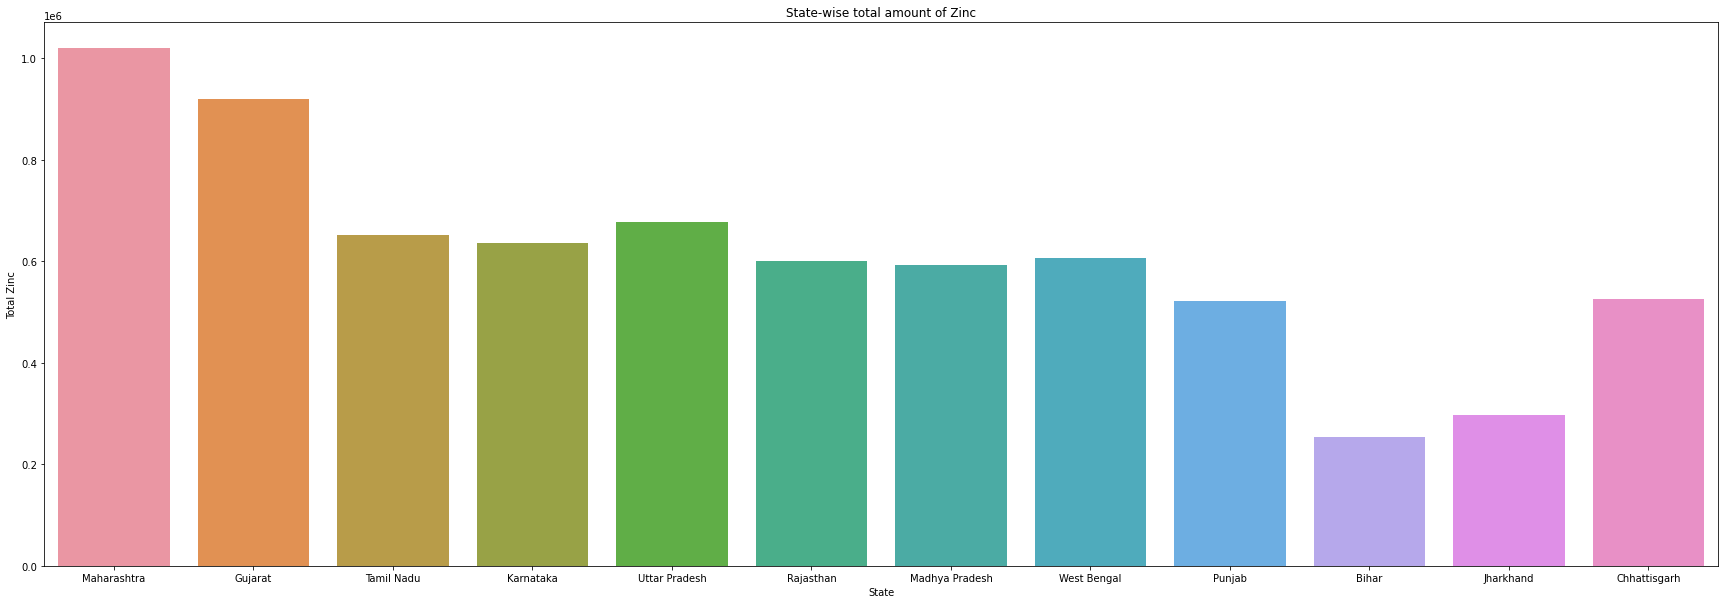

In [36]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Zinc', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Zinc')
plt.xlabel('State')
plt.ylabel('Total Zinc')
plt.show()

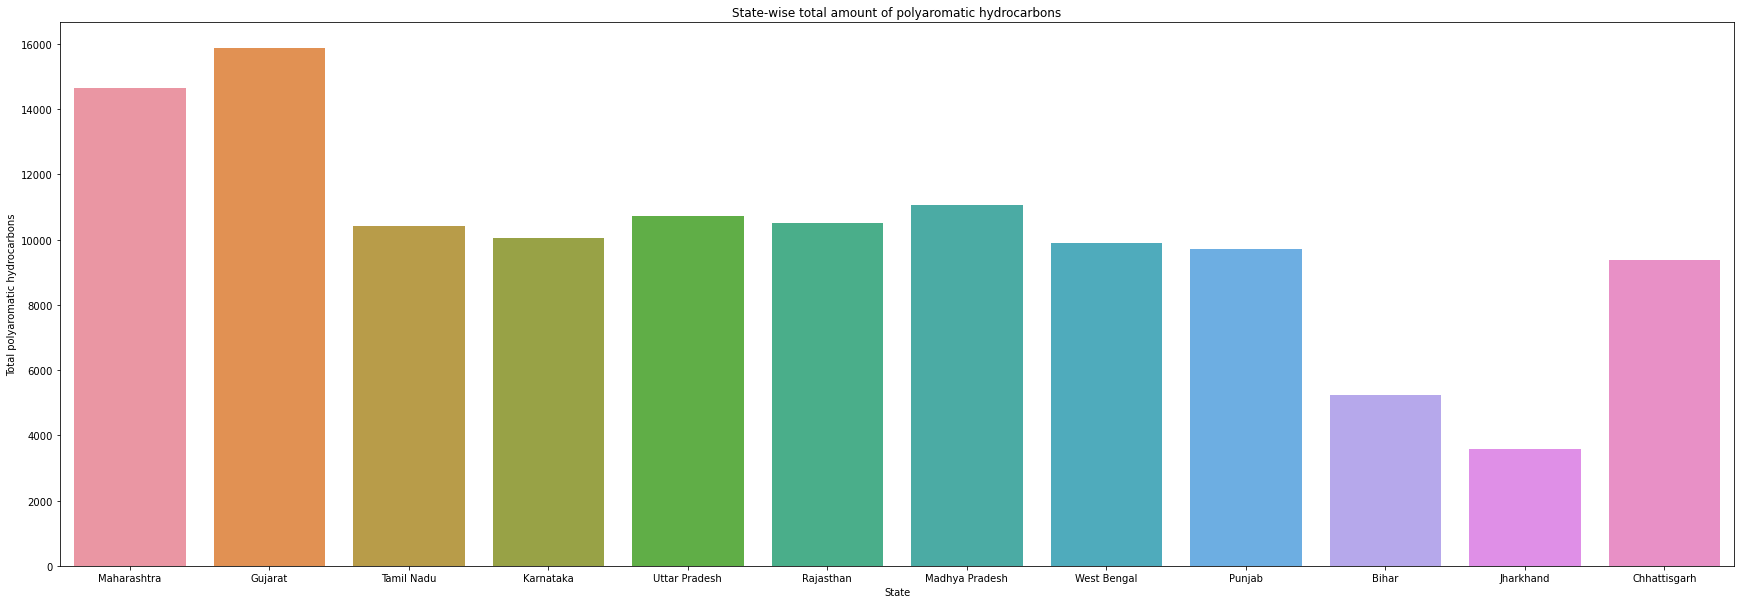

In [37]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='polyaromatic hydrocarbons', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of polyaromatic hydrocarbons')
plt.xlabel('State')
plt.ylabel('Total polyaromatic hydrocarbons')
plt.show()

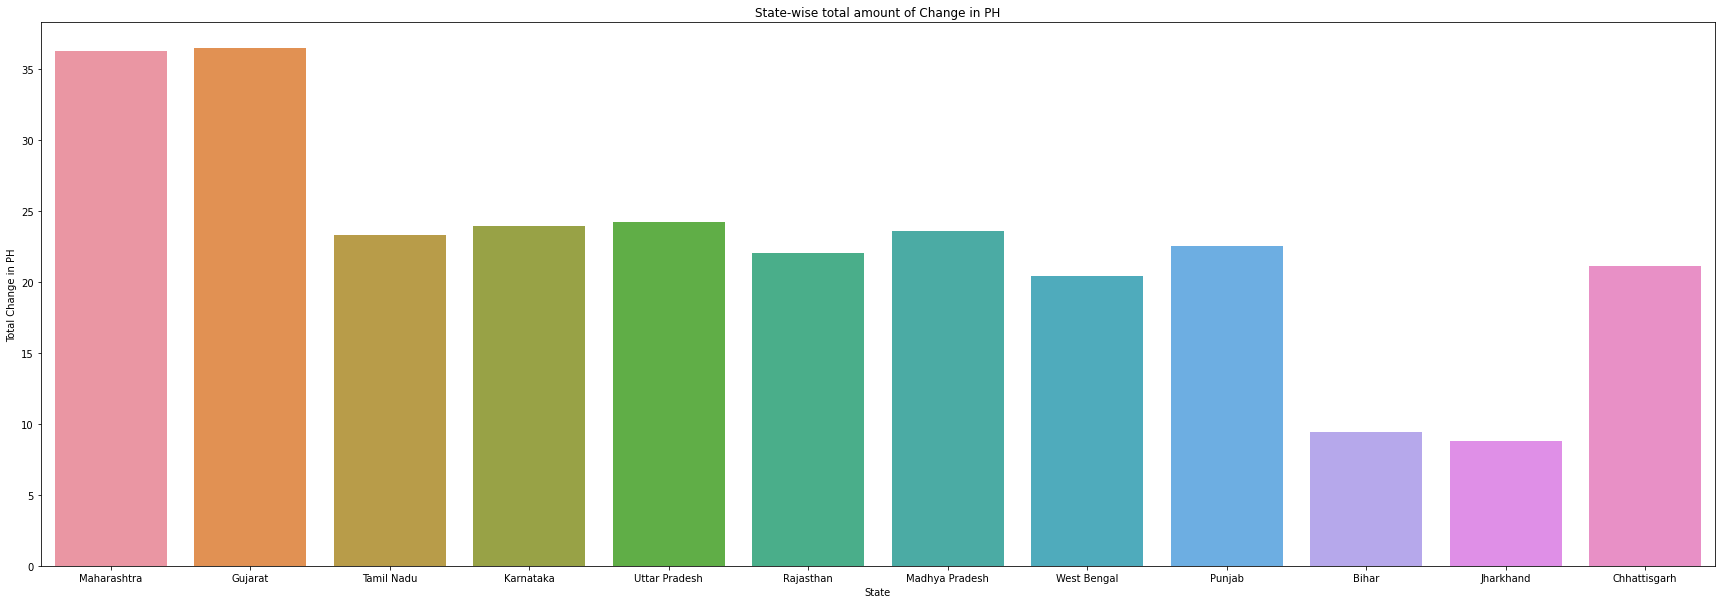

In [38]:
plt.figure(figsize=(30, 10))
sns.barplot(x='State', y='Change in PH', data=df6, estimator=sum, ci=None)
plt.title('State-wise total amount of Change in PH')
plt.xlabel('State')
plt.ylabel('Total Change in PH')
plt.show()

In [39]:
subindex_weights = {
    'Arsenic_SubIndex': 0.165,
    'Chromium_SubIndex': 0.281,
    'Copper_SubIndex': 0.234,
    'Lead_SubIndex': 0.009,
    'Mercury_SubIndex': 0.028,
    'Nickel_SubIndex': 0.281,
    'Zinc_SubIndex': 0.165,
    'polyaromatic hydrocarbons_SubIndex': 0.234,
    'Change in PH_SubIndex': 0.009
}

df6['SQI_calculated'] = sum(df6[subindex] * weight for subindex, weight in subindex_weights.items())
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,...,Arsenic_SubIndex,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex,Mercury_SubIndex,Nickel_SubIndex,Zinc_SubIndex,polyaromatic hydrocarbons_SubIndex,Change in PH_SubIndex,SQI_calculated
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,...,25.542273,14.679997,99.892691,53.274808,52.578141,19.424668,0.000000,90.807981,60.150376,60.914858
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,...,45.063581,87.242349,61.686703,48.182038,6.923831,18.176425,95.245777,16.487459,56.390977,72.201498
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,...,40.451875,4.480495,79.079443,45.074553,59.650461,48.285947,96.365236,5.054839,54.135338,59.652718
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,...,35.105391,38.054906,67.325505,51.369791,30.957105,91.078839,33.881924,17.939554,55.639098,69.451392
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,...,49.109900,100.000000,34.402594,5.101392,27.874964,22.066455,81.570146,67.260910,11.278195,80.580057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,...,23.320511,6.938716,3.779159,79.602467,50.381579,93.231092,37.807824,18.344537,65.413534,46.126664
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,...,19.908059,24.522570,19.715671,19.512277,47.323094,19.438640,16.859772,1.176445,56.015038,25.313340
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,...,54.441568,53.488230,51.304399,24.847169,66.637073,60.196020,34.720053,40.648907,50.977444,70.722275
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,...,17.768732,22.885757,18.733507,19.231465,46.980867,18.556550,15.719197,0.000000,66.917293,23.645240


In [40]:
max_v = df6['SQI_calculated'].max()
min_v = df6['SQI_calculated'].min()


print("Max:", max_v, "Min:", min_v)


Max: 113.16936966839648 Min: 23.64524042211415


In [41]:
def get_AQI_bucket(x):
    if x <= 25:
        return "Good"
    elif x <= 40:
        return "Satisfactory"
    elif x <= 60:
        return "Moderate"
    elif x <= 80:
        return "Poor"
    elif x <= 100:
        return "Very Poor"
    elif x > 100:
        return "Severe"
    else:
        return np.NaN
    
df6["SQI_bucket"] = df6["SQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df6

,State,Steel Industry Location,Arsenic,Chromium,Copper,Lead,Mercury,Nickel,Zinc,polyaromatic hydrocarbons,...,Chromium_SubIndex,Copper_SubIndex,Lead_SubIndex,Mercury_SubIndex,Nickel_SubIndex,Zinc_SubIndex,polyaromatic hydrocarbons_SubIndex,Change in PH_SubIndex,SQI_calculated,SQI_bucket
0,Maharashtra,Mumbai,12561.3599,23070.2076,199468.4757,313727.8575,1289.2706,6031.6586,30639.4367,953.3865,...,14.679997,99.892691,53.274808,52.578141,19.424668,0.000000,90.807981,60.150376,60.914858,Poor
1,Maharashtra,Pune,14500.9188,37295.6515,161541.1466,293574.8694,607.4454,5970.3382,58482.2566,581.4192,...,87.242349,61.686703,48.182038,6.923831,18.176425,95.245777,16.487459,56.390977,72.201498,Poor
2,Maharashtra,Nagpur,14042.7182,21070.6521,178807.0316,281278.0046,1394.8923,7449.4801,58809.5035,524.2000,...,4.480495,79.079443,45.074553,59.650461,48.285947,96.365236,5.054839,54.135338,59.652718,Moderate
3,Gujarat,Ahmedabad,13511.5129,27652.7279,167138.8223,306189.3706,966.3708,9551.6974,40544.0051,588.6868,...,38.054906,67.325505,51.369791,30.957105,91.078839,33.881924,17.939554,55.639098,69.451392,Poor
4,Gujarat,Vadodara,14902.9448,39796.7177,134456.0369,123097.1538,920.3405,6161.4374,54484.5137,835.5356,...,100.000000,34.402594,5.101392,27.874964,22.066455,81.570146,67.260910,11.278195,80.580057,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Rajasthan,Jaipur,12340.6145,21552.5726,104055.9568,417911.0493,1256.4660,9657.4277,41691.6477,590.7137,...,6.938716,3.779159,79.602467,50.381579,93.231092,37.807824,18.344537,65.413534,46.126664,Moderate
157,Rajasthan,Alwar,12001.5670,24999.7890,119876.2340,180123.5670,1210.7890,6032.3450,35567.9870,504.7890,...,24.522570,19.715671,19.512277,47.323094,19.438640,16.859772,1.176445,56.015038,25.313340,Satisfactory
158,Madhya Pradesh,Indore,15432.6780,30678.3450,151234.5670,201234.6780,1499.2340,8034.5670,40789.0120,702.3450,...,53.488230,51.304399,24.847169,66.637073,60.196020,34.720053,40.648907,50.977444,70.722275,Poor
159,Madhya Pradesh,Bhopal,11789.0120,24678.9010,118901.2340,179012.3450,1205.6780,5989.0120,35234.5670,498.9010,...,22.885757,18.733507,19.231465,46.980867,18.556550,15.719197,0.000000,66.917293,23.645240,Good


<Figure size 1008x576 with 0 Axes>

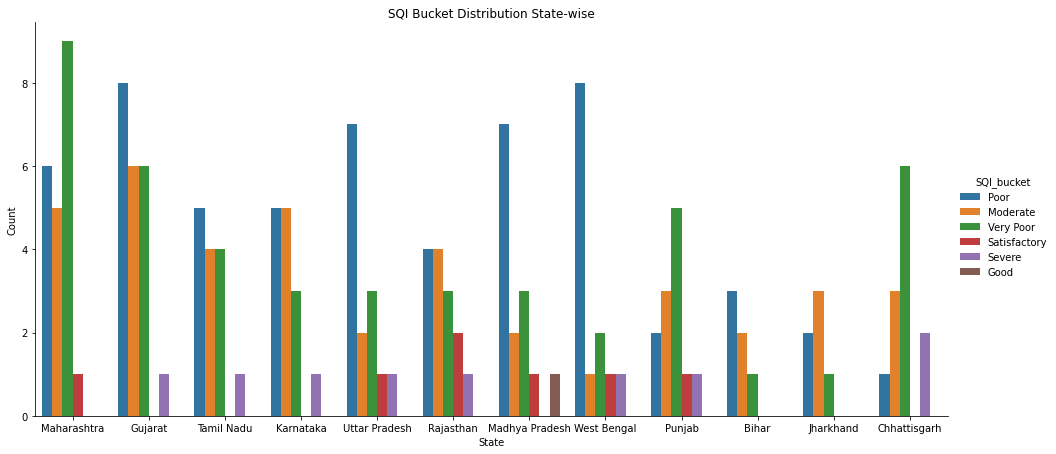

In [42]:
plt.figure(figsize=(14, 8))

sns.catplot(x='State', hue='SQI_bucket', data=df6, kind='count', height=6, aspect=2.2)
plt.title('SQI Bucket Distribution State-wise')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

In [43]:
X = df6[['Arsenic', 'Chromium', 'Copper', 'Lead', 'Mercury', 'Nickel', 'Zinc', 'polyaromatic hydrocarbons', 'Change in PH']]
y = df6['SQI_calculated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [46]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [50]:
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.33, callbacks=[early_stopping])

Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 137.8728 - accuracy: 0.0000e+00 - val_loss: 232.5442 - val_accuracy: 0.0000e+00
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 120.1650 - accuracy: 0.0000e+00 - val_loss: 233.7446 - val_accuracy: 0.0000e+00
Epoch 3/100
3/3 [==============================] - 0s 24ms/step - loss: 108.1562 - accuracy: 0.0000e+00 - val_loss: 234.0956 - val_accuracy: 0.0000e+00
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 98.2809 - accuracy: 0.0000e+00 - val_loss: 231.5976 - val_accuracy: 0.0000e+00
Epoch 5/100
3/3 [==============================] - 0s 22ms/step - loss: 90.5336 - accuracy: 0.0000e+00 - val_loss: 226.0607 - val_accuracy: 0.0000e+00
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 83.7950 - accuracy: 0.0000e+00 - val_loss: 218.9366 - val_accuracy: 0.0000e+00
Epoch 7/100
3/3 [==============================] - 0s 26ms/step - loss: 77.7783 - accuracy:

In [51]:
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'ANN Mean Squared Error: {mse}')

2/2 [==============================] - 0s 0s/step
ANN Mean Squared Error: 100.73578163263917


In [52]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train_scaled, y_train)
y_pred_dt = model_dt.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')


Decision Tree Mean Squared Error: 261.8594643478036


In [53]:
# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_scaled, y_train)
y_pred_rf = model_rf.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')


Random Forest Mean Squared Error: 79.40601171384297


In [54]:
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression Mean Squared Error: {mse_ridge}')


Ridge Regression Mean Squared Error: 0.013331751050199472


In [55]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
y_pred_lasso = model_lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression Mean Squared Error: {mse_lasso}')


Lasso Regression Mean Squared Error: 5.205826753827416


In [56]:
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train_scaled, y_train)
y_pred_gb = model_gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Gradient Boosting Regressor Mean Squared Error: {mse_gb}')

Gradient Boosting Regressor Mean Squared Error: 45.92483610501583


In [57]:
y_pred_dt = model_dt.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)
y_pred_ridge = model_ridge.predict(X_test_scaled)
y_pred_lasso = model_lasso.predict(X_test_scaled)
y_pred_gb = model_gb.predict(X_test_scaled)
y_pred_ann = model.predict(X_test_scaled).flatten()

predictions_df = pd.DataFrame({'Actual': y_test})
predictions_df['DecisionTree'] = y_pred_dt
predictions_df['RandomForest'] = y_pred_rf
predictions_df['RidgeRegression'] = y_pred_ridge
predictions_df['LassoRegression'] = y_pred_lasso
predictions_df['GradientBoosting'] = y_pred_gb
predictions_df['ANN'] = y_pred_ann


predictions_df


2/2 [==============================] - 0s 9ms/step


,Actual,DecisionTree,RandomForest,RidgeRegression,LassoRegression,GradientBoosting,ANN
105,87.788611,81.705788,80.158864,87.614797,85.427397,79.640500,89.714813
108,75.859143,98.319349,82.357408,75.864553,75.472959,77.168795,96.155869
142,80.426802,73.410922,75.368985,80.306538,79.521552,75.839753,64.065056
55,94.543177,84.546757,82.658254,94.357292,91.893298,83.149008,87.381149
94,105.323750,81.900064,82.283462,105.047776,101.983797,87.004036,116.227463
29,84.309405,80.580057,73.411603,84.222782,82.937679,78.830189,87.900627
101,85.114638,66.149896,69.778532,84.997118,82.563276,76.133094,79.200089
51,74.447065,84.522352,75.287897,74.381020,73.393918,76.881913,86.992477
100,71.840897,64.665214,76.215241,71.837164,71.401834,78.653120,71.382462
143,86.988492,84.204617,89.988072,86.858659,83.524675,92.208935,80.840012


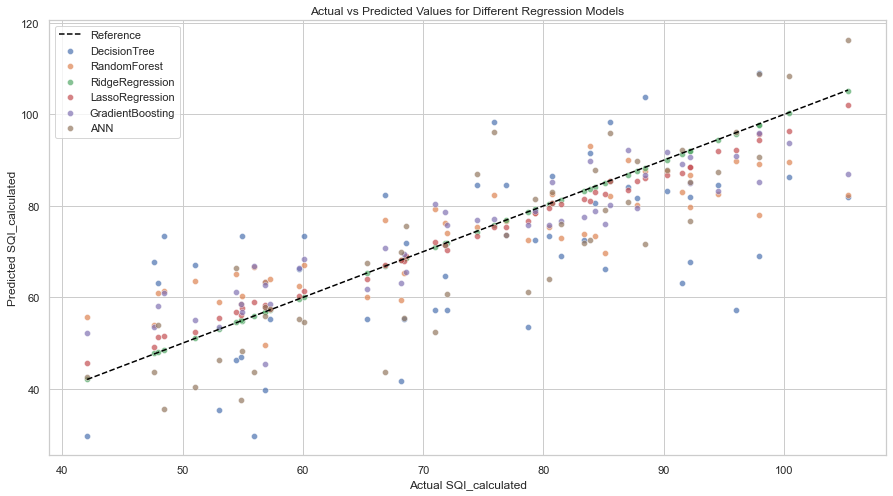

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot for each model
plt.figure(figsize=(15, 8))
models = ['DecisionTree', 'RandomForest', 'RidgeRegression', 'LassoRegression', 'GradientBoosting', 'ANN']

for model in models:
    sns.scatterplot(x='Actual', y=model, data=predictions_df, label=model, alpha=0.7)

# Add a diagonal line for reference
plt.plot([predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         [predictions_df['Actual'].min(), predictions_df['Actual'].max()],
         linestyle='--', color='black', label='Reference')

plt.title('Actual vs Predicted Values for Different Regression Models')
plt.xlabel('Actual SQI_calculated')
plt.ylabel('Predicted SQI_calculated')
plt.legend()
plt.show()


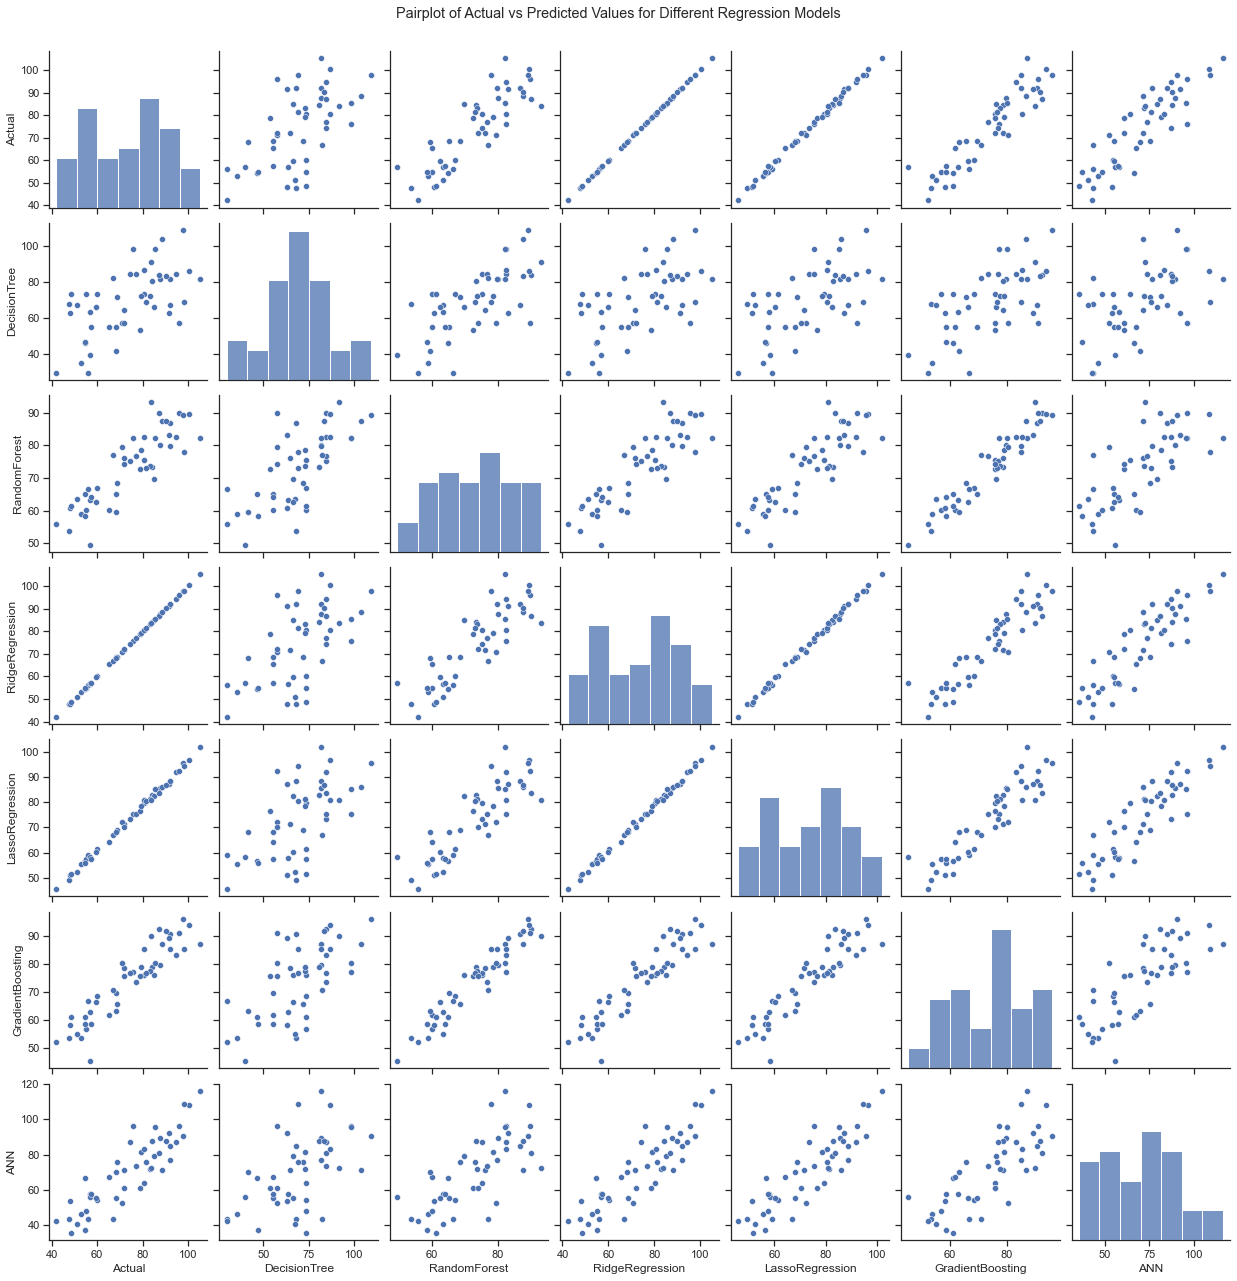

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

pairplot_df = pd.concat([predictions_df['Actual'], predictions_df[models]], axis=1)

sns.set(style="ticks")

sns.pairplot(pairplot_df, height=2.5)
plt.suptitle('Pairplot of Actual vs Predicted Values for Different Regression Models', y=1.02)
plt.show()
